In [12]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [13]:
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [16]:
df_exploded = df.explode('job_skills')

In [22]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

In [26]:
df_skills_count = skills_count.reset_index(name= 'skills_count')

df_skills_count = df_skills_count.sort_values(by= 'skills_count', ascending=False)

df_skills_count

,job_title_short,job_skills,skills_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [33]:
analyst_skills = df_skills_count[df_skills_count['job_title_short'] == 'Data Analyst'].head(10)
analyst_skills

,job_title_short,job_skills,skills_count
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


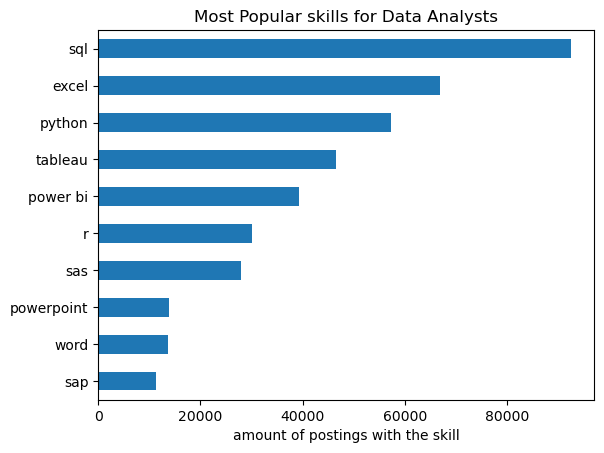

In [42]:
analyst_skills.plot(kind='barh', x='job_skills', y='skills_count')
plt.gca().invert_yaxis()
plt.title('Most Popular skills for Data Analysts')
plt.xlabel('amount of postings with the skill')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()